In [0]:
import pandas as pd                 # package for data frame analysis
import matplotlib.pyplot as plt     # package for graphical plot
import seaborn as sns               # package for graphical plot
import numpy as np                  # package for mathematical calculation
from scipy import stats             # package for statistical calculation
import io                           # pakcage for input/output 
from google.colab import files      # package for Google drive manipulation
import geopy.distance

import warnings                     # disable warning notification (optional)
warnings.filterwarnings('ignore')
%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
data = pd.read_csv('/content/drive/My Drive/Data/trainmod3.csv')
data.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,year,distance
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,17,2009,1.030765
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,16,2010,8.450145
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,0,2011,1.389527
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,4,2012,2.799274
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,7,2010,1.999160


In [0]:
data.shape

(54214662, 10)

In [0]:
data = data.drop(index = data[data['fare_amount']<=0].index)

In [0]:
data['fare_log'] = np.log1p(data['fare_amount']) # log(1+x)


In [0]:
data = data[np.abs(data['fare_log']-data['fare_log'].mean()) <= (3*data['fare_log'].std())]

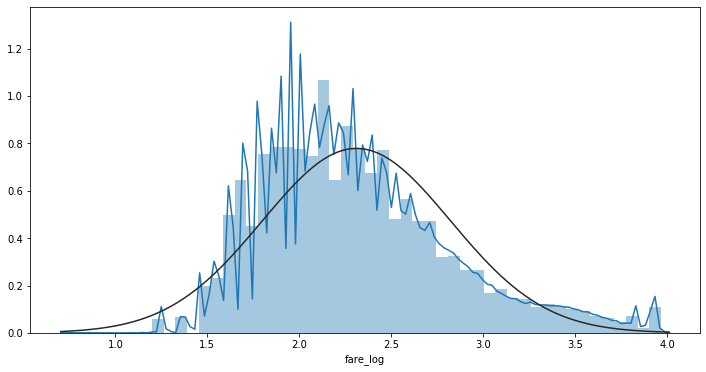

In [0]:
plt.subplots(figsize=(12,6))
sns.distplot(data['fare_log'], fit=stats.norm)

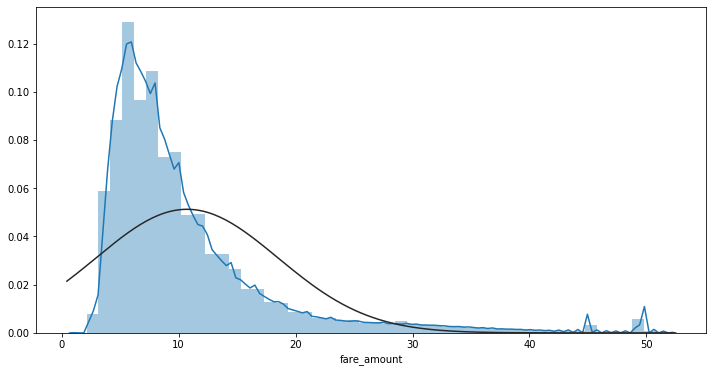

In [0]:
plt.subplots(figsize=(12,6))
sns.distplot(data['fare_amount'], fit=stats.norm)

In [0]:
data_log = data

In [0]:
data = data_log

In [6]:
data = data.drop(columns = 'fare_log')
data.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,year,distance
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,17,2009,1.030765
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,16,2010,8.450145
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,0,2011,1.389527
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,4,2012,2.799274
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,7,2010,1.999160


In [0]:
Y = data['fare_amount'].values
X = data.drop(columns= ['fare_amount']).values

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test =  train_test_split(X,Y, test_size = 0.4)

In [0]:
import statsmodels.api as sm
N = X_train.shape[0]
X1= np.append(arr=np.ones((N,1)).astype(int),values=X_train,axis=1)
#Select constant and age
X1= X1[:,[4,5,6,7]]

In [0]:
regression = sm.OLS(endog=Y_train, exog=X1).fit()
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.954
Model:                            OLS   Adj. R-squared (uncentered):              0.954
Method:                 Least Squares   F-statistic:                          1.685e+08
Date:                Tue, 10 Mar 2020   Prob (F-statistic):                        0.00
Time:                        06:51:54   Log-Likelihood:                     -2.3658e+07
No. Observations:            32147233   AIC:                                  4.732e+07
Df Residuals:                32147229   BIC:                                  4.732e+07
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.7178      0.002   -944.231      0.000      -1.721      -1.714
x2             0.0068   6.76e-05    101.194      0.000       0.007       0.007
x3            -0.0010   1.37e-05    -73.774      0.000      -0.001      -0.001
x4             0.0359   3.69e-05    975.448      0.000       0.036       0.036
==============================================================================
Omnibus:                  2923157.891   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3822541.453
Skew:                           0.792   Prob(JB):                         0.00
Kurtosis:                       3.586   Cond. No.                     4.11e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [0]:
 X = data.drop(columns= ['fare_amount','pickup_longitude', 'pickup_latitude','dropoff_longitude','dropoff_latitude']).values

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test =  train_test_split(X,Y, test_size = 0.4)

In [14]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, Y_train)
print(regression.intercept_) #b
print(regression.coef_)
ypred=regression.predict(X_test)
from sklearn import metrics

-871.2210697511737
[0.05244068 0.00721513 0.43537062 1.87438242]


In [15]:
from sklearn.metrics import mean_squared_error, r2_score
print(f'R-squared   = {r2_score(Y_test, ypred):.4f}')
print(f'RMSE        = {mean_squared_error(Y_test, ypred)**0.5:.4f}')

R-squared   = 0.6748
RMSE        = 4.4399


In [0]:
Y = data['fare_amount'].values
X = data.drop(columns= ['fare_amount']).values

In [0]:
from sklearn import datasets, linear_model
ridge_regr = linear_model.Ridge()
ridge_regr.fit(X_train, Y_train)
y_pred_ridge = ridge_regr.predict(X_test)
print(f'R-squared   = {r2_score(Y_test, y_pred_ridge):.4f}')
print(f'RMSE        = {mean_squared_error(Y_test, y_pred_ridge)**0.5:.4f}')

R-squared   = 0.6715
RMSE        = 4.4617


In [0]:
lasso_regr = linear_model.Lasso()
lasso_regr.fit(X_train, Y_train)
y_pred_lasso = lasso_regr.predict(X_test)
print(f'R-squared   = {r2_score(Y_test, y_pred_lasso):.4f}')
print(f'RMSE        = {mean_squared_error(Y_test, y_pred_lasso)**0.5:.4f}')

R-squared   = 0.6652
RMSE        = 4.5043


In [0]:
en_regr = linear_model.ElasticNet()
en_regr.fit(X_train, Y_train)
y_pred_en = en_regr.predict(X_test)
print(f'R-squared = {r2_score(Y_test, y_pred_en):.4f}')
print(f'RMSE        = {mean_squared_error(Y_test, y_pred_en)**0.5:.4f}')

R-squared = 0.6669
RMSE        = 4.4931


In [0]:
Y = data['fare_log'].values
X = data.drop(columns= ['fare_log']).values
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test =  train_test_split(X,Y, test_size = 0.4)

In [0]:
err=[]
for i in np.arange(0.002,0.02,0.002):
    from sklearn.tree import DecisionTreeRegressor
    regression = DecisionTreeRegressor(min_samples_leaf=5,
                                       min_impurity_decrease=i)
    regression.fit(X_train,Y_train)
    ypred = regression.predict(X_test)

    from sklearn import metrics
    err.append(metrics.explained_variance_score(Y_test,ypred))
np.arange(0.002,0.02,0.002)[np.argmax(err)]

0.002

In [0]:
from sklearn.tree import DecisionTreeRegressor
regression = DecisionTreeRegressor(min_samples_leaf=5,
                                   min_impurity_decrease=0.002)
regression.fit(X_train, Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.002, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [0]:
ypred=regression.predict(X_test)
print(metrics.explained_variance_score(Y_test,ypred))
print(f'RMSE        = {mean_squared_error(Y_test, ypred)**0.5:.4f}')

0.8106283498327271
RMSE        = 3.3876


In [11]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
regression = GradientBoostingRegressor()
regression.fit(X_train,Y_train)
ypred=regression.predict(X_test)
print(metrics.explained_variance_score(Y_test,ypred))
print(f'RMSE        = {mean_squared_error(Y_test, ypred)**0.5:.4f}')

0.8332571074302901
RMSE        = 3.1792


In [0]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
regression = AdaBoostRegressor()
regression.fit(X_train, Y_train)
ypred=regression.predict(X_test)
print(metrics.explained_variance_score(Y_test,ypred))
print(f'RMSE        = {mean_squared_error(Y_test, ypred)**0.5:.4f}')